In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("exercise.csv")

In [9]:
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Hypertension
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [10]:
df['Gender'] = df['Gender'].map({'male' : 1, 'female' : 0})

In [11]:
df['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

In [12]:
# Handling missing values
df.fillna(df.mean(), inplace=True)  # Filling missing values with the mean of respective columns

(array([2770., 2281., 1864., 1606., 1375., 1264., 1100., 1016.,  916.,
         808.]),
 array([20. , 25.9, 31.8, 37.7, 43.6, 49.5, 55.4, 61.3, 67.2, 73.1, 79. ]),
 <BarContainer object of 10 artists>)

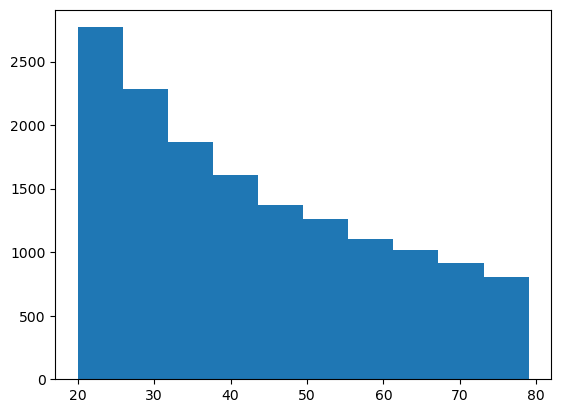

In [8]:
plt.hist(df['Age'])

<Axes: xlabel='Age', ylabel='Hypertension'>

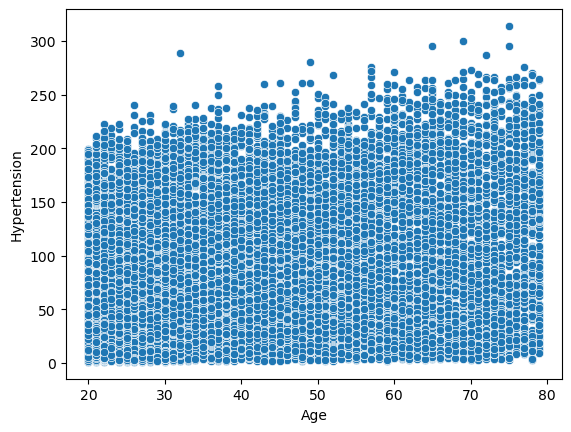

In [9]:
sns.scatterplot(x=df['Age'], y=df['Hypertension'])

<Axes: xlabel='Duration', ylabel='Hypertension'>

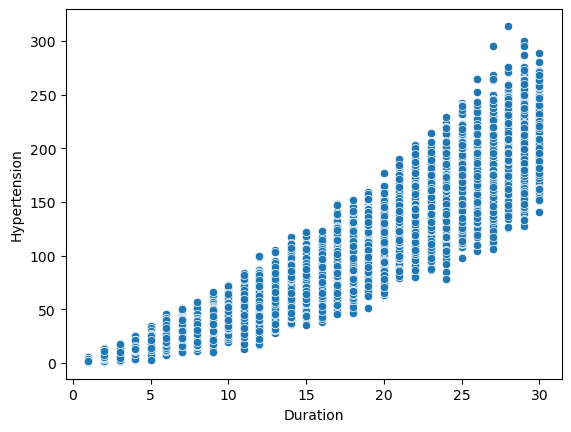

In [10]:
sns.scatterplot(x=df['Duration'], y=df['Hypertension'])

<Axes: xlabel='Gender', ylabel='Age'>

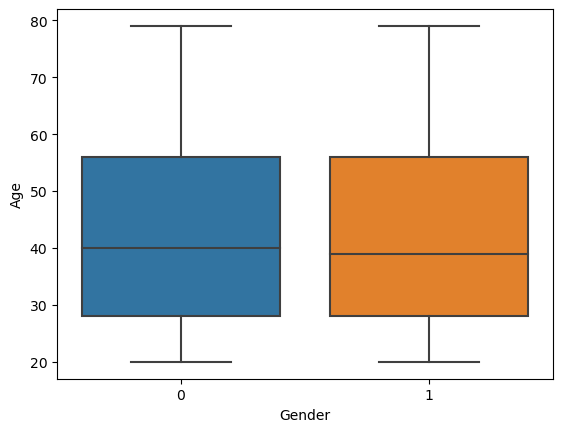

In [11]:
sns.boxplot(x=df['Gender'], y=df['Age'])

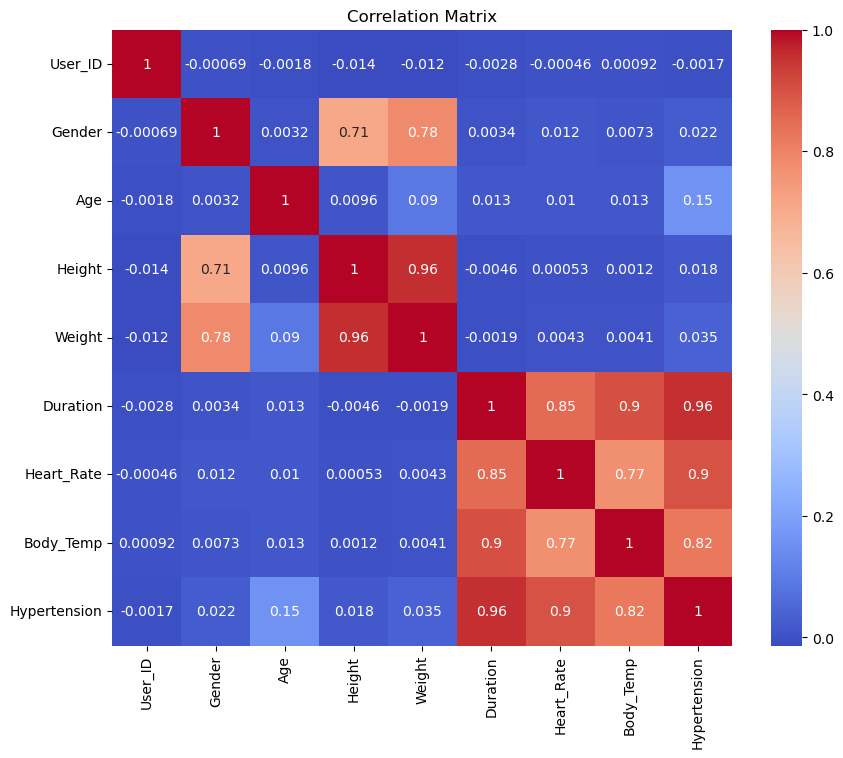

In [12]:
# Feature selection using correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Hypertension
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


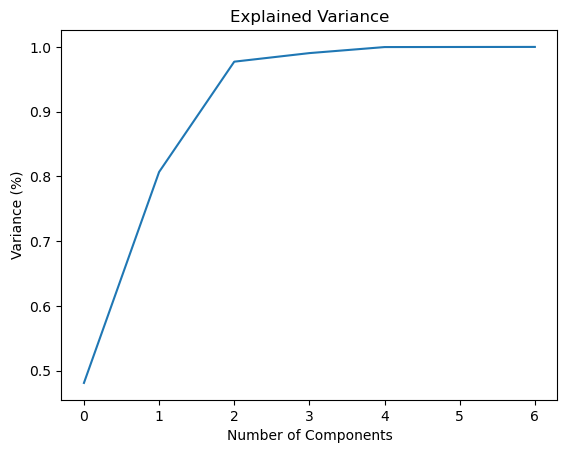

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

<Axes: xlabel='Age', ylabel='Hypertension'>

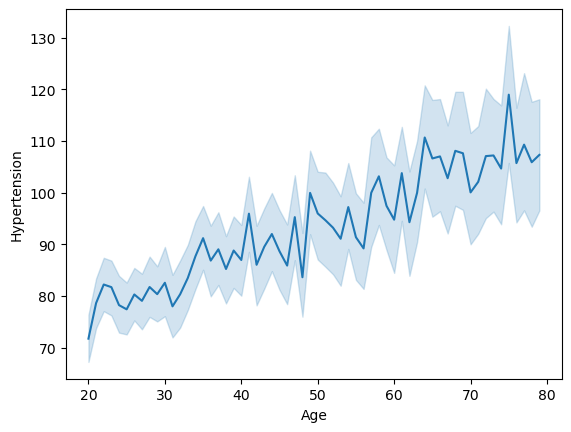

In [21]:
sns.lineplot(x=df['Age'], y=df['Hypertension'])

<Axes: xlabel='Body_Temp', ylabel='Hypertension'>

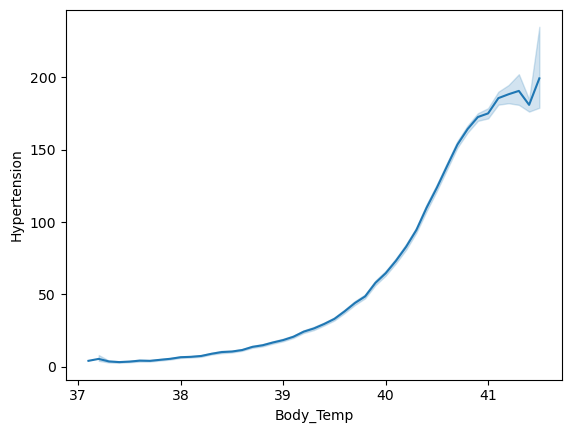

In [22]:
sns.lineplot(x=df['Body_Temp'], y=df['Hypertension'])

<Axes: xlabel='Heart_Rate', ylabel='Hypertension'>

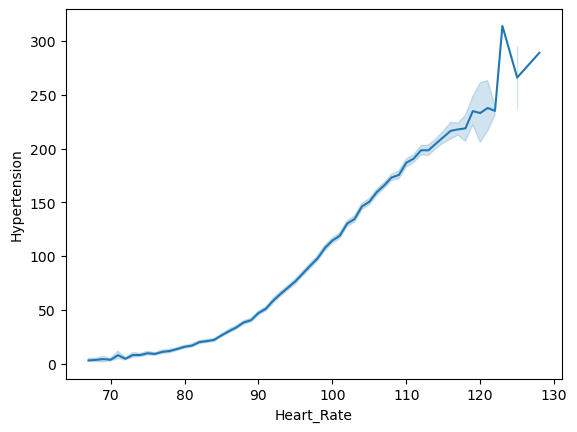

In [23]:
sns.lineplot(x=df['Heart_Rate'], y=df['Hypertension'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10176\1240354820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hypertension'])


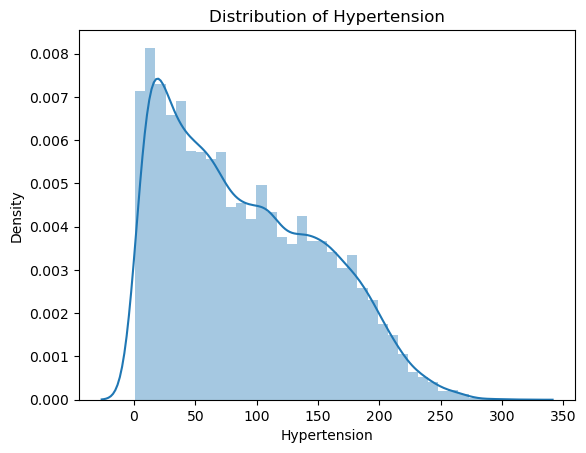

In [24]:
sns.distplot(df['Hypertension'])
plt.title('Distribution of Hypertension')
plt.show()

In [13]:
# Train test split
X = df.drop(['User_ID', 'Hypertension'], axis=1)
y = df['Hypertension']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(12000, 7)

In [17]:
X_test.shape

(3000, 7)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Feature selection
# Assuming you want to use RandomForest for feature selection
selector = SelectFromModel(RandomForestRegressor())
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [21]:
# Dimensionality reduction
# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
# Training Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

In [24]:
for name, mod in models.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    print(f"{name}  MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

lr  MSE: 131.99574575081692, Score: 0.9672937151257295
rd  MSE: 131.99625903139352, Score: 0.9672935879435944
ls  MSE: 143.82689461175065, Score: 0.9643621590908397
dtr  MSE: 27.631, Score: 0.9931535114846277
rfr  MSE: 6.833976700000002, Score: 0.9983066576312521


In [25]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MedAE: {medae}")
    print(f"R^2 Score: {r2}")
    print("----------------------")


Linear Regression:
MSE: 131.99574575081692
RMSE: 11.488940149152876
MAE: 8.441513553849726
MedAE: 6.438014020161319
R^2 Score: 0.9672937151257295
----------------------
Ridge Regression:
MSE: 131.99625903139352
RMSE: 11.488962487161038
MAE: 8.441411841419166
MedAE: 6.43781389038412
R^2 Score: 0.9672935879435944
----------------------
Lasso Regression:
MSE: 143.82689461175065
RMSE: 11.992785106544295
MAE: 8.865121104909482
MedAE: 6.912949762594479
R^2 Score: 0.9643621590908397
----------------------
Decision Tree Regressor:
MSE: 26.759
RMSE: 5.172910206063894
MAE: 3.373
MedAE: 2.0
R^2 Score: 0.9933695781483534
----------------------
Random Forest Regressor:
MSE: 7.094221133333333
RMSE: 2.663497913146044
MAE: 1.6971666666666667
MedAE: 1.0
R^2 Score: 0.9982421735183353
----------------------


In [42]:
# Test cases
test_cases = pd.DataFrame({
    'Gender': [0],  # Male is encoded as 1
    'Age': [26],
    'Height': [172],
    'Weight': [69],
    'Duration': [20],
    'Heart_Rate': [73],
    'Body_Temp': [40.8]
})

# Preprocess the test cases
test_cases_scaled = scaler.transform(test_cases)  # Scale the test cases
test_cases_selected = selector.transform(test_cases_scaled)  # Select relevant features

# Since RandomForestRegressor expects the same number of features as the training data,
# we need to ensure the test cases have the same number of features as well.
# If the number of selected features is different from the training data, we need to handle it accordingly.

if test_cases_selected.shape[1] != X_train_selected.shape[1]:
    # In case the number of selected features is different,
    # you might need to adjust the test case to match the feature selection.
    # For simplicity, you can use the original test case without feature selection.
    # You can replace this part with more sophisticated handling based on your application needs.
    print("Number of selected features in test cases is different. Using original test cases without feature selection.")
    test_cases_scaled = scaler.transform(test_cases)  # Scale the original test cases

# Predict using the trained Random Forest model
prediction = rfr.predict(test_cases_scaled)
print("Predictions for test cases:")
print(prediction)


Predictions for test cases:
[2.11]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

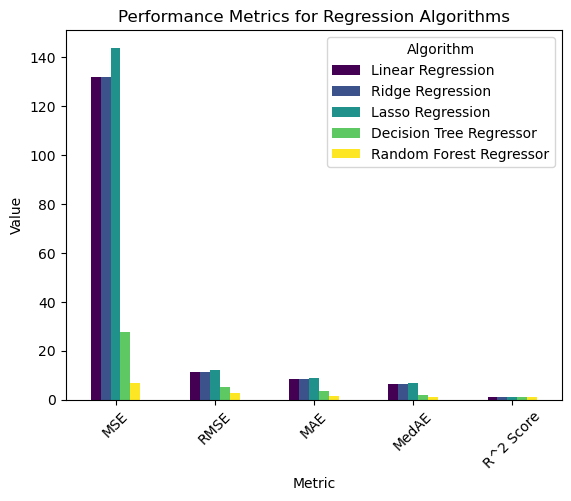

In [43]:
import matplotlib.pyplot as plt

metrics = ['MSE', 'RMSE', 'MAE', 'MedAE', 'R^2 Score']
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = [mse, rmse, mae, medae, r2]

# Create DataFrame for visualization
results_df = pd.DataFrame(results, index=metrics)

# Plotting
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', colormap='viridis', rot=0)
plt.title('Performance Metrics for Regression Algorithms')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Algorithm')
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and print results
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"Cross-Validation RMSE Scores: {rmse_scores}")
    print(f"Mean RMSE: {rmse_scores.mean()}")

# Choose a model (e.g., RandomForestRegressor)
model = RandomForestRegressor()

# Perform cross-validation on the selected model
cross_validate_model(model, X_train, y_train)


Cross-Validation RMSE Scores: [3.0318223  2.88392531 3.35683658 2.97702791 3.14791312]
Mean RMSE: 3.079505045375279


In [ ]:
y_predm = rfr

In [27]:
import pickle

In [28]:
pickle.dump(rfr,open('rfr.pkl','wb'))

In [29]:
X_train.to_csv("X_train.csv")

In [26]:
import numpy as np

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
# Instantiate the base model (Random Forest Regressor)
rf = RandomForestRegressor()

In [30]:
# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                                   n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [31]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-package

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [32]:
# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}


In [33]:
# Use the best model found by RandomizedSearchCV for predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [36]:
# Evaluate the performance of the best model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
print("Performance Metrics for Best Model:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MedAE: {medae}")
print(f"R^2 Score: {r2}")

Performance Metrics for Best Model:
MSE: 7.094221133333333
RMSE: 2.663497913146044
MAE: 1.6971666666666667
MedAE: 1.0
R^2 Score: 0.9982421735183353
